# Universidade Estadual do Ceará

## Mestrado Acadêmico em Ciência da Computação

---

### Trabalho 1 - Regressão Linear com decomposição QR

<div align="justify">
&emsp;Este trabalho acadêmico do mestrado tem como objetivo implementar e avaliar um modelo de regressão linear utilizando o método dos mínimos quadrados com decomposição QR em uma base de dados real.
</div>

---

**Disciplina**: Fundamentos de Análise de Dados

**Docente**: Ph.D Thelmo Pontes de Araújo

**Discente**: Gabriel Lins

---
---
---
# Fundamentação Teórica
---

## Decomposição QR
---
<div align="justify">
&emsp;A decomposição QR é uma técnica matemática que consiste em fatorar uma matriz em um produto de duas matrizes, uma ortogonal e outra triangular superior. A técnica QR é particularmente útil para problemas de regressão linear com alta dimensionalidade e/ou multicolinearidade, pois reduz o número de cálculos necessários para obter a solução. O método de Gram-Schmidt é uma técnica para obter a matriz ortogonal Q da decomposição QR de uma matriz, utilizando sucessivas projeções ortogonais. Esse processo é iterativo e envolve a subtração das componentes ortogonais dos vetores anteriores. 

&emsp;Embora o método de Gram-Schmidt seja uma forma intuitiva de obter a decomposição QR, ele pode apresentar instabilidades numéricas, principalmente quando a matriz é mal-condicionada. Por isso, existem outras variantes mais estáveis e eficientes, como a decomposição QR modificada de Householder e a decomposição QR de rotações de Givens.
</div>

## Método dos mínimos quadrados
---

<div align="justify">
&emsp;O método dos mínimos quadrados é um procedimento estatístico utilizado para estimar os parâmetros desconhecidos de um modelo linear, minimizando a soma dos quadrados das diferenças entre os valores observados e os valores preditos pelo modelo. Dado um modelo linear 

$$Ax = b $$

&emsp;onde $b$ é o vetor de variáveis dependentes, $A$ é a matriz de variáveis independentes e $x$ é o vetor de parâmetros desconhecidos, o método dos mínimos quadrados estima os valores de **x** encontrando uma solução aproximada, $\tilde{x}$, que minimiza a soma dos quadrados dos resíduos. Para conseguir essa aproximação, primeiramente projeta-se **b** no espaço-nulo esquerdo de A e resolve-se a equação normal

$$ A^TAx = A^Tb $$

Para resolver, substitui-se **A** por sua decomposição QR e obtém a seguinte equação normal:

$$ R\tilde{x} = Q^Tb $$

</div>

## Base de Dados
---
<div align="justify">
&emsp;A base de dados utilizada neste trabalho é a "Protein Localization Sites" composta por variáveis contínuas e categóricas. A base possui 1484 instâncias de proteínas de levedura e 8 atributos preditivos. Os atributos possuem siglas como "mcg", "gvh" e "mit" e representam métodos de reconhecimento de sequência de sinal, pontuação de programas de predição de região de membrana, presença de substrings e escores de análise discriminante. A classe é a localização da proteína e possui 10 possíveis valores, como "NUC" para nuclear e "MIT" para mitocondrial.

&emsp;Alguns exemplos dos dados podem ser vistos abaixo:
</div>

| Sequence_Name | mcg  | gvh  | alm  | mit  | erl  | pox  | vac  | nuc  | label |
| -------------|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|------:|
| ADT1_YEAST   | 0.58 | 0.61 | 0.47 | 0.13 | 0.50 | 0.00 | 0.48 | 0.22 |   MIT |
| ADT2_YEAST   | 0.43 | 0.67 | 0.48 | 0.27 | 0.50 | 0.00 | 0.53 | 0.22 |   MIT |
| ADT3_YEAST   | 0.64 | 0.62 | 0.49 | 0.15 | 0.50 | 0.00 | 0.53 | 0.22 |   MIT |
| AAR2_YEAST   | 0.58 | 0.44 | 0.57 | 0.13 | 0.50 | 0.00 | 0.54 | 0.22 |   NUC |

---
---
---
# Código
---

## Leitura dos dados

In [212]:
import pandas as pd

# Lendo o arquivo csv
df = pd.read_csv('../data/yeast.data.csv')

# Imprimindo o início dos dados
print(df.head())
print(f"Dataset size: {len(df.index)}")

  Sequence_Name   mcg   gvh   alm   mit  erl  pox   vac   nuc label
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT
Dataset size: 1484


## Separando os dados em treinamento e teste

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop("label", axis=1).drop("Sequence_Name", axis=1)
# X = X.drop("pox", axis=1) # Tentativa de melhorar a estimativa (não melhora)
y = df["label"]

# Separando os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Atribuindo valores numéricos para as classes
le = LabelEncoder()
y_train = pd.DataFrame(le.fit_transform(y_train))
y_test = pd.DataFrame(le.fit_transform(y_test))

print(X_train.head())
print(y_train.head())
print(f"Train size: {len(X_train.index)}")
print(f"Test size: {len(y_test.index)}")

       mcg   gvh   alm   mit  erl  pox   vac   nuc
1228  0.31  0.40  0.31  0.17  0.5  0.0  0.52  0.22
1032  0.37  0.37  0.51  0.38  0.5  0.0  0.44  0.22
757   0.26  0.28  0.60  0.20  0.5  0.0  0.54  0.31
481   0.40  0.51  0.42  0.13  0.5  0.0  0.45  0.25
129   0.41  0.40  0.59  0.47  0.5  0.0  0.48  0.43
   0
0  5
1  0
2  6
3  5
4  0
Train size: 1038
Test size: 446


## Adicionando uma coluna de "1s"

In [214]:
import numpy as np

if X_train.shape[1] == X.shape[1]:
    ones_train = np.ones((X_train.shape[0], 1)) # Cria um array de 1's com o mesmo número de linhas de X_train
    X_train = np.concatenate((X_train, ones_train), axis=1) # Concatena o array de 1's com X_train

if X_test.shape[1] == X.shape[1]:
    ones_test = np.ones((X_test.shape[0], 1)) # Cria um array de 1's com o mesmo número de linhas de X_test
    X_test = np.concatenate((X_test, ones_test), axis=1) # Concatena o array de 1's com X_test

print(pd.DataFrame(X_train).head())
print(pd.DataFrame(X_test).head())

      0     1     2     3    4    5     6     7    8
0  0.31  0.40  0.31  0.17  0.5  0.0  0.52  0.22  1.0
1  0.37  0.37  0.51  0.38  0.5  0.0  0.44  0.22  1.0
2  0.26  0.28  0.60  0.20  0.5  0.0  0.54  0.31  1.0
3  0.40  0.51  0.42  0.13  0.5  0.0  0.45  0.25  1.0
4  0.41  0.40  0.59  0.47  0.5  0.0  0.48  0.43  1.0
      0     1     2     3    4    5     6     7    8
0  0.59  0.60  0.49  0.43  0.5  0.0  0.53  0.31  1.0
1  0.45  0.56  0.51  0.64  0.5  0.0  0.54  0.22  1.0
2  0.57  0.50  0.40  0.08  0.5  0.0  0.47  0.22  1.0
3  0.53  0.44  0.47  0.22  0.5  0.0  0.53  0.22  1.0
4  0.38  0.37  0.36  0.14  0.5  0.0  0.54  0.22  1.0


## Calculando o posto (dimensão do espaço coluna) das matrizes

In [215]:
posto_X_train = np.linalg.matrix_rank(X_train)
posto_X_test = np.linalg.matrix_rank(X_test)

print("Posto de X_train:", posto_X_train)
print("Posto de X_test:", posto_X_test)

Posto de X_train: 9
Posto de X_test: 9


## Decomposição QR da matriz X de treinamento

In [216]:
Q, R = np.linalg.qr(X_train)

np.set_printoptions(suppress=True)
print("Matriz Q (arredondada)")
print(np.round(Q[:4,:], 3))
print("Matriz R (arredondada)")
print(np.round(R, 3))

Matriz Q (arredondada)
[[-0.018 -0.027  0.005 -0.001  0.068 -0.    -0.035  0.019 -0.052]
 [-0.022 -0.004 -0.032  0.037  0.021 -0.002  0.013  0.012 -0.032]
 [-0.015 -0.008 -0.067 -0.004  0.016 -0.003 -0.029  0.002  0.01 ]
 [-0.024 -0.033  0.002 -0.023  0.025 -0.002  0.013  0.002 -0.042]]
Matriz R (arredondada)
[[-16.8   -16.171 -15.452  -8.269 -15.757  -0.279 -15.569  -8.398 -31.088]
 [  0.     -3.758  -1.931  -1.008  -2.182   0.042  -2.219  -1.358  -4.368]
 [  0.      0.     -5.146  -1.224  -2.969  -0.048  -2.807  -1.977  -6.179]
 [  0.      0.      0.      4.202   0.023  -0.027  -0.096  -0.067   0.167]
 [  0.      0.      0.      0.      2.424  -0.053   1.587   1.046   2.786]
 [  0.      0.      0.      0.      0.      2.535   0.039  -0.09    0.001]
 [  0.      0.      0.      0.      0.      0.     -2.269  -0.856  -1.519]
 [  0.      0.      0.      0.      0.      0.      0.     -3.342  -0.338]
 [  0.      0.      0.      0.      0.      0.      0.      0.     -2.018]]


## Obtendo a estimativa $\tilde{x}$

Primeiro calculamos $Q^Tb = y$ para, então, resolver $R\tilde{x} = y$

In [217]:
Qtb = np.dot(Q.T, y_train.values)

x = np.linalg.solve(R, Qtb)

print(x)
print(f"Tamanho de x: {len(x)}")

[[-2.10870976]
 [-0.13984511]
 [-3.84603587]
 [ 2.34265516]
 [-2.31232249]
 [ 4.32551887]
 [-1.15158888]
 [ 5.8936976 ]
 [ 6.69671939]]
Tamanho de x: 9


##  Cálculo das estimativas

In [218]:
y_train_est = np.dot(X_train, x)
y_test_est = np.dot(X_test, x)
y_train_est_round = np.round(y_train_est, 0)
y_test_est_round = np.round(y_test_est, 0)

print("Estimativa de treinamento:")
print(y_train_est[:6])
print("Estimativa de teste:")
print(y_test_est[:6])

print("Estimativa de treinamento (arredondada):")
print(y_train_est_round[:6])
print("Estimativa de teste (arredondada):")
print(y_test_est_round[:6])

Estimativa de treinamento:
[[4.73468759]
 [4.42723788]
 [4.31923475]
 [4.27017275]
 [5.43346317]
 [3.95331748]]
Estimativa de teste:
[[4.55200062]
 [4.72590198]
 [3.6730358 ]
 [3.75542877]
 [4.30566004]
 [4.84777737]]
Estimativa de treinamento (arredondada):
[[5.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]]
Estimativa de teste (arredondada):
[[5.]
 [5.]
 [4.]
 [4.]
 [4.]
 [5.]]


## Gráfico de $ŷ \times y$ para os dados de treinamento

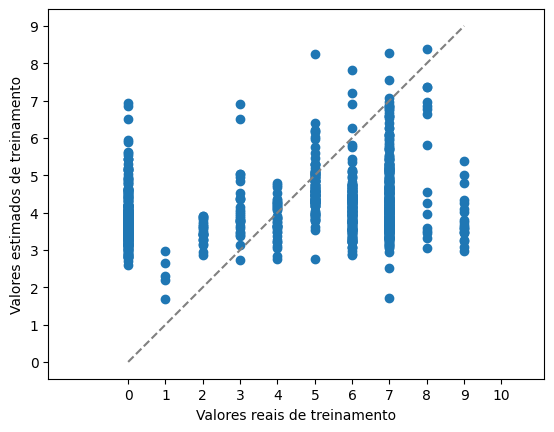

In [219]:
import matplotlib.pyplot as plt

# Gerar o gráfico de dispersão
plt.scatter(y_train, y_train_est)

# Configura os tamanhos do gráfico
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 11, 1))

# Adicionar a reta pontilhada a +45◦ do eixo das abscissas
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='gray')

# Configurar os eixos do gráfico
plt.xlabel('Valores reais de treinamento')
plt.ylabel('Valores estimados de treinamento')
plt.axis('equal')

# Exibir o gráfico
plt.show()

## RMSE de treinamento

Vamos usar a seguinte fórmula 

$$RMSE_{train} = \sqrt{\frac{1}{n_{train}}\sum_{i=1}^{n_{train}}(y_{train}^{(i)} - \hat{y}_{train}^{(i)})^2}$$

In [220]:
RMSE_train = np.sqrt(np.mean((y_train - y_train_est)**2))

print('RMSE_train:', RMSE_train)

RMSE_train: 2.903370754332278


## Gráfico de $ŷ \times y$ para os dados de teste

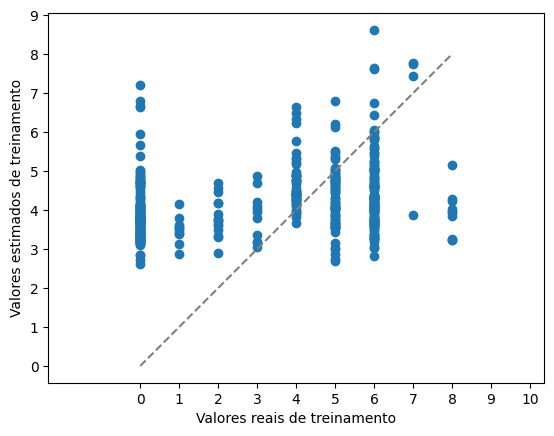

In [221]:
import matplotlib.pyplot as plt

# Gerar o gráfico de dispersão
plt.scatter(y_test, y_test_est)

# Configura os tamanhos do gráfico
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 11, 1))

# Adicionar a reta pontilhada a +45◦ do eixo das abscissas
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')

# Configurar os eixos do gráfico
plt.xlabel('Valores reais de treinamento')
plt.ylabel('Valores estimados de treinamento')
plt.axis('equal')

# Exibir o gráfico
plt.show()

## RMSE de teste

Vamos usar a seguinte fórmula 

$$RMSE_{test} = \sqrt{\frac{1}{n_{test}}\sum_{i=1}^{n_{test}}(y_{test}^{(i)} - \hat{y}_{test}^{(i)})^2}$$

In [222]:
RMSE_test = np.sqrt(np.mean((y_test - y_test_est)**2))

print('RMSE_test:', RMSE_test)

RMSE_test: 2.6687229966483845
